Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

## AutoGluon Classifier

In [3]:
# Load in the wine dataset
wine = datasets.load_wine()

In [4]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target

In [5]:
X=df
label = 'target'
# Split your data with these ratios: train: 0.8 | test: 0.2
X_train, X_test = train_test_split(
X, test_size=0.20, random_state=42)

In [6]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up

save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(path=save_path,label=label).fit( time_limit=120,
    presets="best_quality",  train_data=X_train)

Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "agModels-predictClass/"
AutoGluon Version:  0.3.1
Train Data Rows:    142
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 1, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1519.77 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each 

Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 114.61s of the 114.61s of remaining time.
	0.9789	 = Validation score   (accuracy)
	4.32s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 109.96s of the 109.95s of remaining time.
		`import lightgbm` failed. If you are using Mac OSX, Please try 'brew install libomp'. Detailed info: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)
Repeating k-fold bagging: 2/20
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 109.94s of the 109.94s of remaining time.
No improvement since epoch 

	0.9859	 = Validation score   (accuracy)
	34.37s	 = Training   runtime
	3.13s	 = Validation runtime
Repeating k-fold bagging: 11/20
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 53.06s of the 53.06s of remaining time.
No improvement since epoch 5: early stopping
No improvement since epoch 2: early stopping
No improvement since epoch 1: early stopping
No improvement since epoch 5: early stopping
No improvement since epoch 3: early stopping
	0.993	 = Validation score   (accuracy)
	22.98s	 = Training   runtime
	0.37s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 50.98s of the 50.98s of remaining time.
	0.9789	 = Validation score   (accuracy)
	6.28s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 50.3s of the 50.3s of remaining time.
	0.9859	 = Validation score   (accuracy)
	38.26s	 = Training   runtime
	3.45s	 = Validation runtime
Repeating k-fold bagging: 12/20
Fit

In [7]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   NeuralNetFastAI_BAG_L1   0.992958       0.566223  35.564890                0.566223          35.564890            1       True          3
1      WeightedEnsemble_L2   0.992958       0.566435  35.668031                0.000212           0.103141            2       True         10
2    ExtraTreesEntr_BAG_L1   0.985915       0.054883   0.306453                0.054883           0.306453            1       True          8
3    ExtraTreesGini_BAG_L1   0.985915       0.056332   0.309441                0.056332           0.309441            1       True          7
4    NeuralNetMXNet_BAG_L1   0.985915       5.368193  59.274979                5.368193          59.274979            1       True          9
5  RandomForestEntr_BAG_L1   0.978873       0.055054   0.303323                0.05505

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7253521126760564,
  'NeuralNetFastAI_BAG_L1': 0.9929577464788732,
  'RandomForestGini_BAG_L1': 0.971830985915493,
  'RandomForestEntr_BAG_L1': 0.9788732394366197,
  'CatBoost_BAG_L1': 0.9788732394366197,
  'ExtraTreesGini_BAG_L1': 0.9859154929577465,
  'ExtraTreesEntr_BAG_L1': 0.9859154929577465,
  'NeuralNetMXNet_B

<AxesSubplot:xlabel='model'>

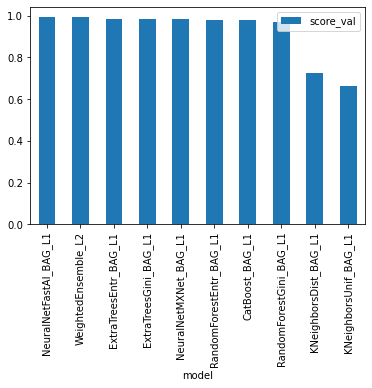

In [8]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [9]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(X_test)

y_pred = predictor.predict(X_test)

print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=X_test['target'], y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 1.0
Evaluations on test data:
{
    "accuracy": 1.0,
    "balanced_accuracy": 1.0,
    "mcc": 1.0
}
Evaluation: accuracy on test data: 1.0
Evaluations on test data:
{
    "accuracy": 1.0,
    "balanced_accuracy": 1.0,
    "mcc": 1.0
}


Predictions:  
 19     0
45     0
140    2
30     0
67     1
16     0
119    1
174    2
109    1
141    2
24     0
150    2
41     0
118    1
15     0
111    1
113    1
82     1
9      0
114    1
18     0
66     1
60     1
169    2
171    2
164    2
117    1
65     1
90     1
55     0
29     0
128    1
145    2
31     0
12     0
42     0
Name: target, dtype: int64


In [10]:
X_test[X_test['target']!=y_pred]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


## AutoGluon Regression

In [21]:

# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

OSError: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [20]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
dfd['target'] = diabetes.target

In [17]:
# Split your data with these ratios: train: 0.8 | test: 0.2
X=df
label = 'target'
dfd_train, dfd_test = train_test_split(
X, test_size=0.20, random_state=42)

In [18]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(label=label, problem_type="regression", eval_metric="r2").fit(train_data=dfd_train,presets= "best_quality", time_limit=120,verbosity=0)

No path specified. Models will be saved in: "AutogluonModels/ag-20211121_191536/"
		`import lightgbm` failed. If you are using Mac OSX, Please try 'brew install libomp'. Detailed info: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)
		`import lightgbm` failed. If you are using Mac OSX, Please try 'brew install libomp'. Detailed info: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp

KeyboardInterrupt: 

In [ ]:
# Output the fit summary of the training run
predictor.fit_summary()

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)
performance

In [ ]:

y_pred = predictor.predict(dfd_test)

#print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=dfd_test['target'], y_pred=y_pred, auxiliary_metrics=True)

In [ ]:
perf